In [22]:
from copy import deepcopy
import random 

import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from sympy.abc import x

from fit_functions import simulate_generation, simulate_first_generation, loss_polynomial, polynomial_simulation, get_config, generate_scatter, simulate_polynomial, simulate_gridsearch, parse_config
import selection_functions
import recombination_functions
import mutation_functions
from plotting import plot_generation
%matplotlib inline

import bokeh.io

bokeh.io.reset_output()
bokeh.io.output_notebook()

Loading BokehJS ...

In [23]:
num_generations = 20
candidates_after_generation = 100
survivors_per_generation = 20
recombination_parents = 2

selection_function=selection_functions.deterministic_truncation
recombination_function=recombination_functions.swap_random_parameters
mutation_function=mutation_functions.mutate_cooling

elitist = 0
first_mutation_rate = 0.05
mutation_cooldown = 5


coefficient_min = -20
coefficient_max = 20
polynomial_grade = 4 # needs only to be set if gui is not used to generate polynomial

x_min = -100
x_max = 100
y_min = -100  # only for displaying in first graph
y_max = 100  # only for displaying in first graph
size = 1000
x = np.linspace(x_min, x_max, size)

In [24]:
import ipywidgets as widgets
from IPython.display import display

degree_widget = widgets.IntSlider(2,1,6,description='Grad des Polynoms:', style={'description_width': 'initial'})

display(degree_widget)

IntSlider(value=2, description='Grad des Polynoms:', max=6, min=1, style=SliderStyle(description_width='initia…

FloatSlider(value=1.0, description='Grad 0:', max=20.0, min=-20.0)

FloatSlider(value=1.0, description='Grad 1:', max=20.0, min=-20.0)

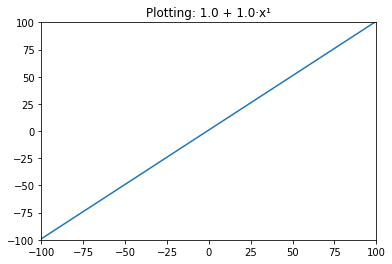

In [25]:
polynomial_grade = degree_widget.value

coefficient_widgets = []

for degree in range(polynomial_grade):
    coefficient_widget = widgets.FloatSlider(value=1,min=coefficient_min,max=coefficient_max,description='Grad %s:'%degree)
    coefficient_widgets.append(coefficient_widget)
    display(coefficient_widget)
    
polynom = np.polynomial.polynomial.Polynomial([coefficient.value for coefficient in coefficient_widgets])

fig, ax = plt.subplots()
plt.title('Plotting: %s'%polynom)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)


lines = plt.plot(x, polynom(x))    

def update_polynomial(change):
    polynom.coef=[coefficient.value for coefficient in coefficient_widgets]
    plt.title('Plotting: %s'%polynom)
    lines[0].set_data(x, polynom(x))

    fig.canvas.draw()
    fig.canvas.flush_events()
    
for coefficient_widget in coefficient_widgets:
    coefficient_widget.observe(update_polynomial, names='value')


In [26]:
#polynom = simulate_polynomial(polynomial_grade, coefficient_min, coefficient_max)

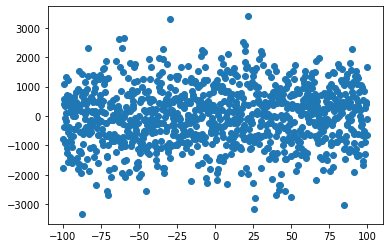

In [27]:
scatter_y = generate_scatter(polynom, x, scatter_multiplier=10)


fig = plt.figure()
plt.scatter(x, scatter_y)
plt.show()

In [29]:
simuparams = (
    polynomial_grade,
    coefficient_min,
    coefficient_max,
    x,
    scatter_y,
    num_generations,
    survivors_per_generation, 
    candidates_after_generation,  
    selection_function, 
    recombination_function, 
    mutation_function,
    elitist,
    recombination_parents, 
    first_mutation_rate)

config = get_config(*simuparams)

simudata, best_polynomial = polynomial_simulation(*simuparams,config,save_plots = True, cooldown = mutation_cooldown)

Done with generation 0
Simulation complete.


In [30]:
import ipywidgets as wg
from IPython.display import Image

def display_simulation(x):
    return Image(filename=f'./plots/{config}/generation_{x}.png') 

wg.interact(display_simulation, x=wg.IntSlider(min=0,max=num_generations-1,step=1));

interactive(children=(IntSlider(value=0, description='x', max=19), Output()), _dom_classes=('widget-interact',…

In [31]:
from bokeh.plotting import figure, output_file, show
from bokeh.plotting import figure

p = figure(plot_width=400, plot_height=400, tools='pan,ywheel_zoom', active_scroll='ywheel_zoom')
p.line(list(range(num_generations)),simudata )
show(p)

In [13]:
polynom

Polynomial(-13.8, 3.6, 0.5, domain=[-1,  1], window=[-1,  1])

In [14]:
best_polynomial

Polynomial([-16.66654104, -18.20655351,   4.42904429,   0.50462629], domain=[-1,  1], window=[-1,  1])